In [7]:
import os
from constants import *
# from cleanvision import Imagelab
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [8]:
KAGGLE_HERBARIUM_22_TRAIN

'/projectnb/herbdl/data/kaggle-herbaria/herbarium-2022/train_images/'

## Kaggle images

In [3]:
kaggle22_train = pd.read_csv(KAGGLE_HERBARIUM_22_TRAIN_CSV).drop(columns=['Unnamed: 0'])
print(f"Number of training samples in Kaggle Herbarium 22: {len(kaggle22_train)}")
kaggle22_val = pd.read_csv(KAGGLE_HERBARIUM_22_VAL_CSV).drop(columns=['Unnamed: 0'])
print(f"Number of validation samples in Kaggle Herbarium 22: {len(kaggle22_val)}")

kaggle22 = pd.concat([kaggle22_train, kaggle22_val]).reset_index(drop=True)

kaggle22_file_paths = [os.path.join(KAGGLE_HERBARIUM_22_TRAIN, file) for file in kaggle22['filename'].tolist()]
print(f"Number of images in Kaggle Herbarium 22: {len(kaggle22_file_paths)}")
kaggle22_file_paths[:5]
kaggle21_train = pd.read_csv(KAGGLE_HERBARIUM_21_TRAIN_CSV).drop(columns=['Unnamed: 0'])
print(f"Number of training samples in Kaggle Herbarium 21: {len(kaggle21_train)}")
kaggle21_val = pd.read_csv(KAGGLE_HERBARIUM_21_VAL_CSV).drop(columns=['Unnamed: 0'])
print(f"Number of validation samples in Kaggle Herbarium 21: {len(kaggle21_val)}")

kaggle21 = pd.concat([kaggle21_train, kaggle21_val]).reset_index(drop=True)

kaggle21_file_paths = [os.path.join(KAGGLE_HERBARIUM_21_TRAIN_CSV, file) for file in kaggle21['filename'].tolist()]
print(f"Number of images in Kaggle Herbarium 21 Train: {len(kaggle21_file_paths)}")
kaggle21_file_paths[:5]

Number of training samples in Kaggle Herbarium 22: 671817
Number of validation samples in Kaggle Herbarium 22: 167955
Number of images in Kaggle Herbarium 22: 839772
Number of training samples in Kaggle Herbarium 21: 1806207
Number of validation samples in Kaggle Herbarium 21: 451552
Number of images in Kaggle Herbarium 21 Train: 2257759


['/projectnb/herbdl/data/kaggle-herbaria/train_2021.csv/494/80/1123740.jpg',
 '/projectnb/herbdl/data/kaggle-herbaria/train_2021.csv/161/93/1242345.jpg',
 '/projectnb/herbdl/data/kaggle-herbaria/train_2021.csv/069/53/2238072.jpg',
 '/projectnb/herbdl/data/kaggle-herbaria/train_2021.csv/001/99/1458.jpg',
 '/projectnb/herbdl/data/kaggle-herbaria/train_2021.csv/219/79/344538.jpg']

In [4]:
kaggle21_trainn = pd.read_csv(KAGGLE_HERBARIUM_21_TRAIN_CSV).drop(columns=['Unnamed: 0'])
print(f"Number of training samples in Kaggle Herbarium 21: {len(kaggle21_train)}")
kaggle21_val = pd.read_csv(KAGGLE_HERBARIUM_21_VAL_CSV).drop(columns=['Unnamed: 0'])
print(f"Number of validation samples in Kaggle Herbarium 21: {len(kaggle21_val)}")

kaggle21 = pd.concat([kaggle21_train, kaggle21_val]).reset_index(drop=True)

kaggle21_file_paths = [os.path.join(KAGGLE_HERBARIUM_21_TRAIN_CSV, file) for file in kaggle21['filename'].tolist()]
print(f"Number of images in Kaggle Herbarium 21 Train: {len(kaggle21_file_paths)}")
kaggle21_file_paths[:5]

Number of training samples in Kaggle Herbarium 21: 1806207
Number of validation samples in Kaggle Herbarium 21: 451552
Number of images in Kaggle Herbarium 21 Train: 2257759


['/projectnb/herbdl/data/kaggle-herbaria/train_2021.csv/494/80/1123740.jpg',
 '/projectnb/herbdl/data/kaggle-herbaria/train_2021.csv/161/93/1242345.jpg',
 '/projectnb/herbdl/data/kaggle-herbaria/train_2021.csv/069/53/2238072.jpg',
 '/projectnb/herbdl/data/kaggle-herbaria/train_2021.csv/001/99/1458.jpg',
 '/projectnb/herbdl/data/kaggle-herbaria/train_2021.csv/219/79/344538.jpg']

In [5]:
KAGGLE_FILEPATHS = kaggle22_file_paths + kaggle21_file_paths
print(f"Total number of images from Kaggle: {len(KAGGLE_FILEPATHS)}")

Total number of images from Kaggle: 3097531


In [6]:
# find the overlap between the two datasets
kaggle21_train['scientificName'] = kaggle21_train['scientificName'].str.lower()
kaggle22_train['scientificName'] = kaggle22_train['scientificName'].str.lower()

# find the overlap in the scientific names
overlap = kaggle21_train['scientificName'].isin(kaggle22_train['scientificName'])
print(f"Number of overlapping scientific names: {overlap.sum()}")

Number of overlapping scientific names: 887901


In [9]:
kaggle_21_species = set(kaggle21['scientificName'].unique())
kaggle_22_species = set(kaggle22['scientificName'].unique())
print(f"Number of unique species in Kaggle Herbarium 21: {len(kaggle_21_species)}")
print(f"Number of unique species in Kaggle Herbarium 22: {len(kaggle_22_species)}")

overlap_species = kaggle_21_species.intersection(kaggle_22_species)
print(f"Number of overlapping species: {len(overlap_species)}")

Number of unique species in Kaggle Herbarium 21: 61338
Number of unique species in Kaggle Herbarium 22: 15501
Number of overlapping species: 12251


## De-duplicating Kaggle datasets and saving

In [10]:
from cleanvision import Imagelab
# Specify path to folder containing the image files in your dataset
save_path = "./results"

imagelab = Imagelab.load(save_path)

Successfully loaded Imagelab


In [11]:
exact_duplicate_sets = imagelab.info["exact_duplicates"]["sets"]

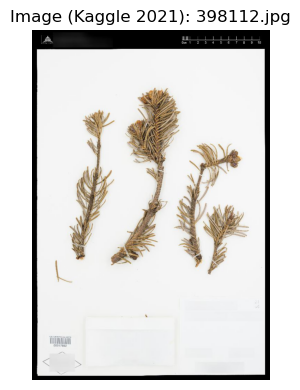

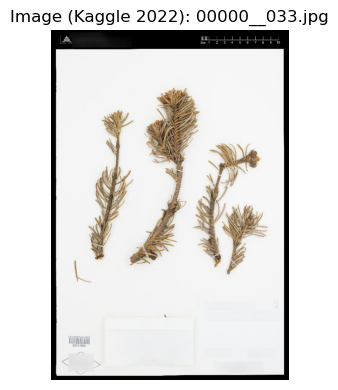

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import os

def display_image(filepath):
    """
    Display an image from a filepath in a Jupyter notebook.
    
    Parameters:
    filepath (str): Path to the image file
    """
    try:
        # Open the image
        img = Image.open(filepath)
        
        # Create a figure and display the image
        plt.figure(figsize=(5, 4))
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        if '2021' in filepath:
            plt.title(f"Image (Kaggle 2021): {os.path.basename(filepath)}")
        elif '2022' in filepath:
            plt.title(f"Image (Kaggle 2022): {os.path.basename(filepath)}")
       
        plt.tight_layout()
        plt.show()
        
    except FileNotFoundError:
        print(f"Error: File '{filepath}' not found.")
    except Exception as e:
        print(f"Error loading image: {e}")

# Example usage:

sample_index = 2

display_image(exact_duplicate_sets[sample_index][0])
display_image(exact_duplicate_sets[sample_index][1])


In [13]:
from PIL import Image
import torch
from torchvision import transforms
from tqdm import tqdm

def check_duplicate_images(image_pairs):
    """
    Check if pairs of images are identical.
    
    Parameters:
    image_pairs (list): A list of [N, 2] image path pairs to compare
                       e.g., [['path1.jpg', 'path2.jpg'], ['path3.jpg', 'path4.jpg']]
    
    Returns:
    list: A list of dictionaries containing comparison results for each pair
    """
    transform = transforms.ToTensor()
    results = []
    
    for idx, (path1, path2) in tqdm(enumerate(image_pairs), total=len(image_pairs), desc="Checking image pairs"):
        result = {
            'pair_index': idx,
            'image1': path1,
            'image2': path2,
            'identical': False,
            'error': None
        }
        
        try:
            # Load images
            img1 = Image.open(path1)
            img2 = Image.open(path2)
            
            # Convert to tensors
            tensor1 = transform(img1)
            tensor2 = transform(img2)
            
            result['shape1'] = tuple(tensor1.shape)
            result['shape2'] = tuple(tensor2.shape)
            
            # Check if identical
            if tensor1.shape != tensor2.shape:
                result['identical'] = False
                result['error'] = 'Different dimensions'
            else:
                result['identical'] = torch.equal(tensor1, tensor2)
                
                # Calculate differences if not identical
                if not result['identical']:
                    diff = torch.abs(tensor1 - tensor2)
                    result['max_diff'] = torch.max(diff).item()
                    result['mean_diff'] = torch.mean(diff).item()
                    
        except Exception as e:
            result['error'] = str(e)
        
        results.append(result)
    
    return results

image_pairs = exact_duplicate_sets[10000:20000]

results = check_duplicate_images(image_pairs)

# Print results
for result in results:
    # print(f"\nPair {result['pair_index']}: {result['image1']} vs {result['image2']}")
    if result['error']:
        print(f"  Error: {result['error']}")
    else:
        # print(f"  Shapes: {result['shape1']} vs {result['shape2']}")
        # print(f"  Identical: {result['identical']}")
        if not result['identical'] and 'max_diff' in result:
            print(f"  Max difference: {result['max_diff']:.6f}")
            print(f"  Mean difference: {result['mean_diff']:.6f}")

# Count duplicates
duplicates = sum(1 for r in results if r['identical'])
print(f"\n{duplicates} out of {len(results)} pairs are identical")

Checking image pairs: 100%|██████████| 10000/10000 [12:04<00:00, 13.80it/s]


10000 out of 10000 pairs are identical


In [12]:
kaggle22['filename'] = kaggle22['filename'].apply(lambda x: os.path.join(KAGGLE_HERBARIUM_22_TRAIN, x))
kaggle21['filename'] = kaggle21['filename'].apply(lambda x: os.path.join(KAGGLE_HERBARIUM_21_TRAIN, x))

In [13]:
kaggle_df = pd.concat([kaggle22, kaggle21])
kaggle_df = kaggle_df.reset_index(drop=True)
kaggle_df.rename(columns={"filename": "filepath"}, inplace=True)
kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097531 entries, 0 to 3097530
Data columns (total 8 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   image_id               object
 1   filepath               object
 2   caption                object
 3   scientificName         object
 4   family                 object
 5   genus                  object
 6   species                object
 7   scientificNameEncoded  int64 
dtypes: int64(1), object(7)
memory usage: 189.1+ MB


In [14]:
import numpy as np

images_to_delete = [np.random.choice(duplicate_set) for duplicate_set in exact_duplicate_sets]
print(f"Number of images to delete: {len(images_to_delete)}")

to_delete_indices = kaggle_df[kaggle_df['filepath'].isin(images_to_delete)].index

Number of images to delete: 229215


In [15]:
kaggle_df = kaggle_df.drop(index=to_delete_indices).reset_index(drop=True)
kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2868316 entries, 0 to 2868315
Data columns (total 8 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   image_id               object
 1   filepath               object
 2   caption                object
 3   scientificName         object
 4   family                 object
 5   genus                  object
 6   species                object
 7   scientificNameEncoded  int64 
dtypes: int64(1), object(7)
memory usage: 175.1+ MB


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

kaggle_df['scientificNameEncoded'] = le.fit_transform(kaggle_df['scientificName'])

kaggle_df.head()

,image_id,filepath,caption,scientificName,family,genus,species,scientificNameEncoded
0,12640__012,/projectnb/herbdl/data/kaggle-herbaria/herbarium-2022/train_images/126/40/12640__012.jpg,"This is an image of species cordovensis, in the genus Roldana of family Asteraceae. It is part of the collection of institution K.",Asteraceae Roldana cordovensis,Asteraceae,Roldana,cordovensis,9327
1,01612__004,/projectnb/herbdl/data/kaggle-herbaria/herbarium-2022/train_images/016/12/01612__004.jpg,"This is an image of species sophoroides, in the genus Astragalus of family Fabaceae. It is part of the collection of institution NY.",Fabaceae Astragalus sophoroides,Fabaceae,Astragalus,sophoroides,25255
2,02962__081,/projectnb/herbdl/data/kaggle-herbaria/herbarium-2022/train_images/029/62/02962__081.jpg,"This is an image of species whitneyi, in the genus Carex of family Cyperaceae. It is part of the collection of institution COLO.",Cyperaceae Carex whitneyi,Cyperaceae,Carex,whitneyi,18683
3,08401__098,/projectnb/herbdl/data/kaggle-herbaria/herbarium-2022/train_images/084/01/08401__098.jpg,"This is an image of species philadelphicum, in the genus Lilium of family Liliaceae. It is part of the collection of institution COLO.",Liliaceae Lilium philadelphicum,Liliaceae,Lilium,philadelphicum,33710
4,02707__054,/projectnb/herbdl/data/kaggle-herbaria/herbarium-2022/train_images/027/07/02707__054.jpg,"This is an image of species hoodii, in the genus Carex of family Cyperaceae. It is part of the collection of institution ID.",Cyperaceae Carex hoodii,Cyperaceae,Carex,hoodii,18322


In [19]:
kaggle_df.to_csv(DATA_PATH + "kaggle-herbaria/index.csv", index=False)